<a href="https://colab.research.google.com/github/fabrizio-lanzetti/Machine-Learning/blob/main/reg_lineal_simp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

In [ ]:
df = pd.read_csv(r"D:\Python+datos\Datos_csv\calidad_agua_procesado.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              2042 non-null   object 
 1   salinidad(ppt)     2042 non-null   float64
 2   ph                 2042 non-null   float64
 3   profundiad_secchi  2042 non-null   float64
 4   profundiad_agua    2042 non-null   float64
 5   temperatura_agua   2042 non-null   float64
 6   temperatura_aire   2042 non-null   float64
dtypes: float64(6), object(1)
memory usage: 111.8+ KB


,fecha,salinidad(ppt),ph,profundiad_secchi,profundiad_agua,temperatura_agua,temperatura_aire
0,1990-01-22,1.0,7.5,0.15,0.65,10.0,12.0
1,1990-02-07,3.4,7.5,0.20,0.60,10.0,10.0
2,1990-02-12,3.2,7.0,0.20,0.70,10.0,9.0
3,1990-02-20,4.2,7.5,0.15,0.39,5.0,5.0
4,1990-02-27,2.8,7.0,0.50,1.50,2.5,1.0


In [ ]:
df.describe()

,salinidad(ppt),ph,profundiad_secchi,profundiad_agua,temperatura_agua,temperatura_aire
count,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000,2042.000000
mean,0.707517,7.158252,0.527231,0.758925,18.157351,15.680451
std,1.223984,0.788749,0.483780,0.610608,8.321394,10.222837
min,0.000000,0.300000,0.000000,0.010000,0.000000,-17.777778
25%,0.000000,6.500000,0.300000,0.400000,11.000000,8.888889
50%,0.000000,7.000000,0.400000,0.650000,19.000000,16.666667
75%,1.000000,7.500000,0.650000,0.950000,25.000000,23.888889
max,9.000000,9.900000,9.000000,12.000000,74.000000,33.500000


### Observaciones

| Variable           | Mínimo   | Máximo  | Media   | Desviación Estándar |
|--------------------|----------|---------|---------|---------------------|
| Temperatura del agua | 0.0      | 18.5    | 18.0    | 8.3                 |
| Temperatura del aire | -17.7    | 15.6    | 15.6    | 10.2                |



In [ ]:
data = df.drop(columns="fecha")

### Se va a intentar predecir la temperatura del agua con una regresion lineal simple.
Vamos a ver informacion de la variable Temperatura del Agua

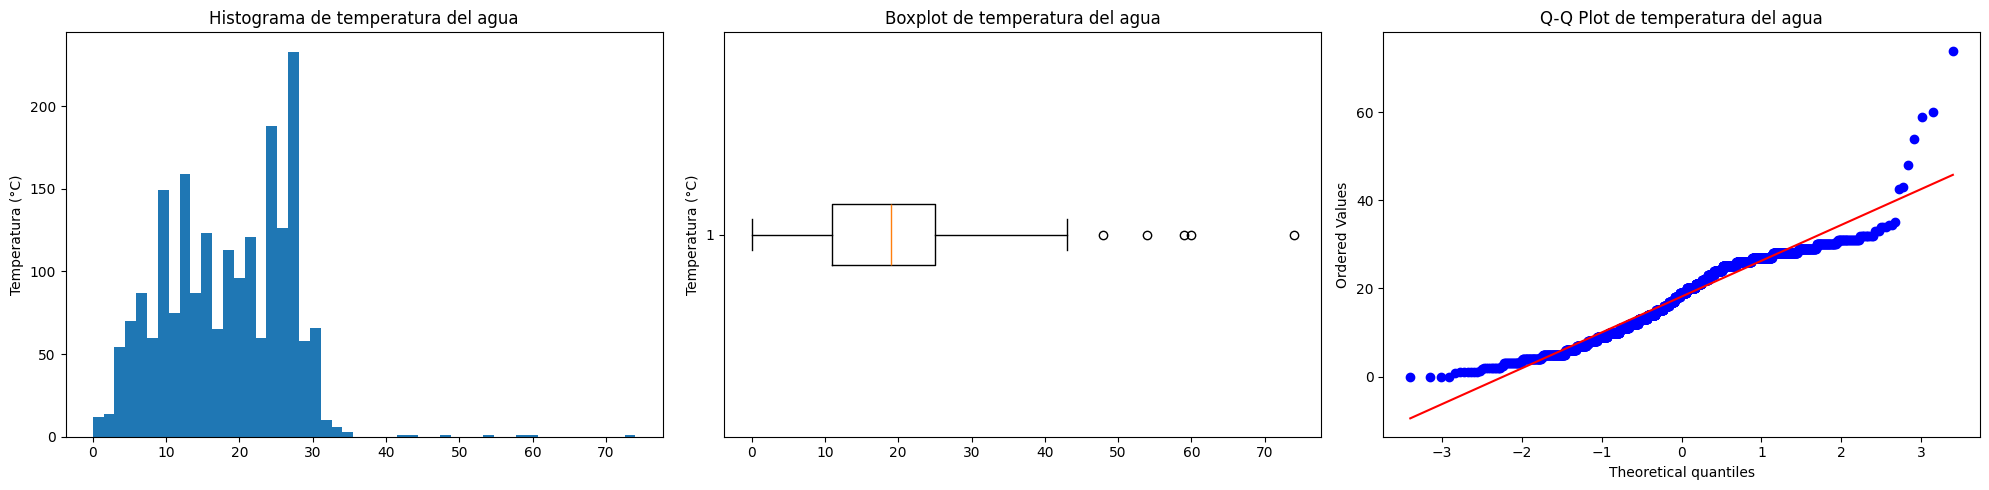

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))


axs[0].hist(df["temperatura_agua"],bins = 50)
axs[0].set_title("Histograma de temperatura del agua")
axs[0].set_ylabel("Temperatura (°C)")


axs[1].boxplot(df["temperatura_agua"],vert=False)
axs[1].set_title("Boxplot de temperatura del agua")
axs[1].set_ylabel("Temperatura (°C)")


stats.probplot(df["temperatura_agua"], dist="norm", plot=axs[2])  # Q-Q plot
axs[2].set_title("Q-Q Plot de temperatura del agua")

plt.tight_layout()  # Ajustar diseño para evitar superposición
plt.show()


### Los graficos que se observan nos muestra la distribucion de nuestra variable objetivo "Temperatura del agua"
* El HISTOGRAMA y el BOXPLOT nos muestran una concentracion de datos significativa que va en el rango de 12°C a 25°C aproximadamente.
* Tal como vemos en el BOXPLOT tenemos outliers que van desde 45°C  a 75°C aproximadamente.
* En el HISTOGRAMA vemos que los outliers en este rango son poco frecuentes, ademas vemos que la temperatura de moda es aproximadamente 27°C.
* En el BOXPLOT se observa que la cola de la derecha es mas pequeña que la izquierda, esto se ve reflejado en el Q-Q PLOT.
* En el Q-Q PLOT podemos confirmar que no es una distribucion normal y que esta sesgada a la derecha, osea que se confirma un sesgo positivo.


In [ ]:
print("La moda de la variable objetivo es: ",data["temperatura_agua"].mode())
print("La media de la variable objetivo es: ",np.mean(data["temperatura_agua"]))

La moda de la variable objetivo es:  0    27.0
Name: temperatura_agua, dtype: float64
La media de la variable objetivo es:  18.157350636630753


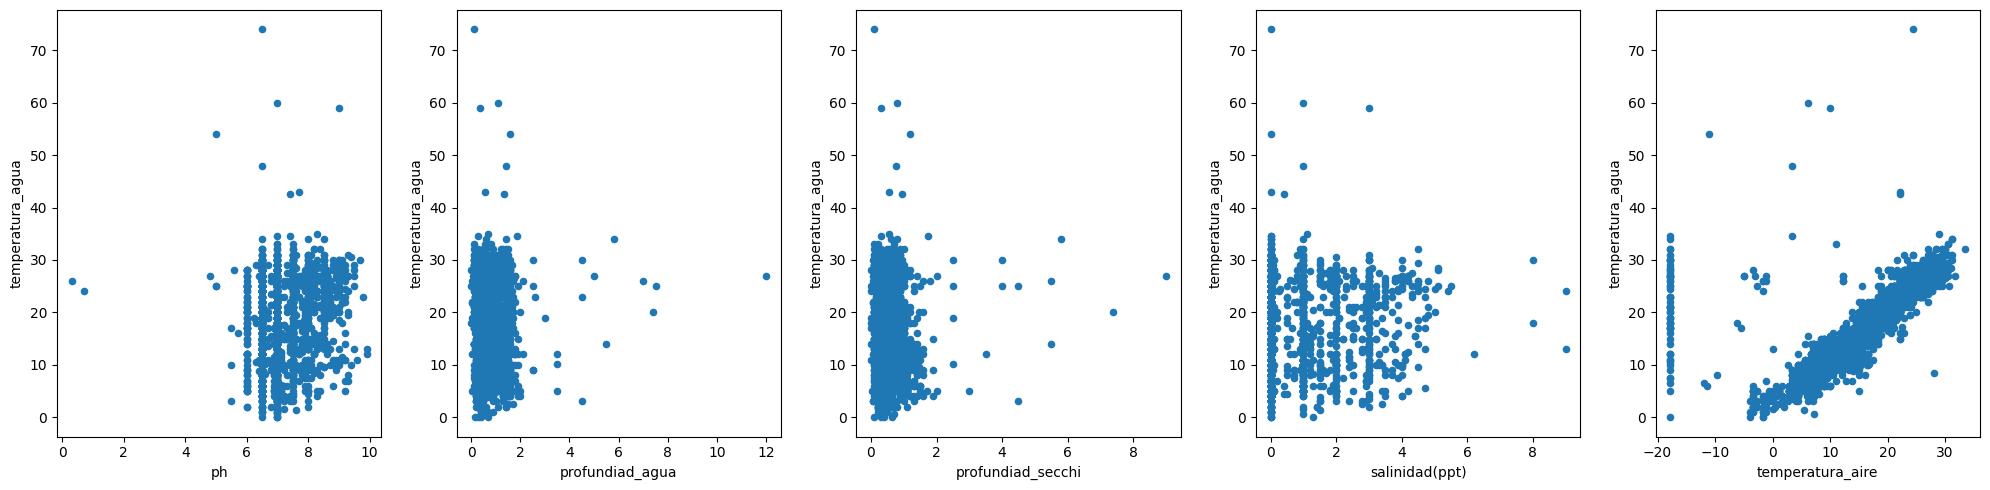

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

df.plot.scatter(x="ph", y="temperatura_agua", ax=axs[0])
df.plot.scatter(x="profundiad_agua", y="temperatura_agua", ax=axs[1])
df.plot.scatter(x="profundiad_secchi", y="temperatura_agua", ax=axs[2])
df.plot.scatter(x="salinidad(ppt)", y="temperatura_agua", ax=axs[3])
df.plot.scatter(x="temperatura_aire", y="temperatura_agua", ax=axs[4])

plt.tight_layout()
plt.show()

### Regresion lineal para predecir la temperatura del agua con la variable "TEMPERATURA DEL AGUA"
| Variable            | Correlación con temperatura del agua |
|---------------------|--------------------------------------|
| Temperatura del aire | 0.67                                 |


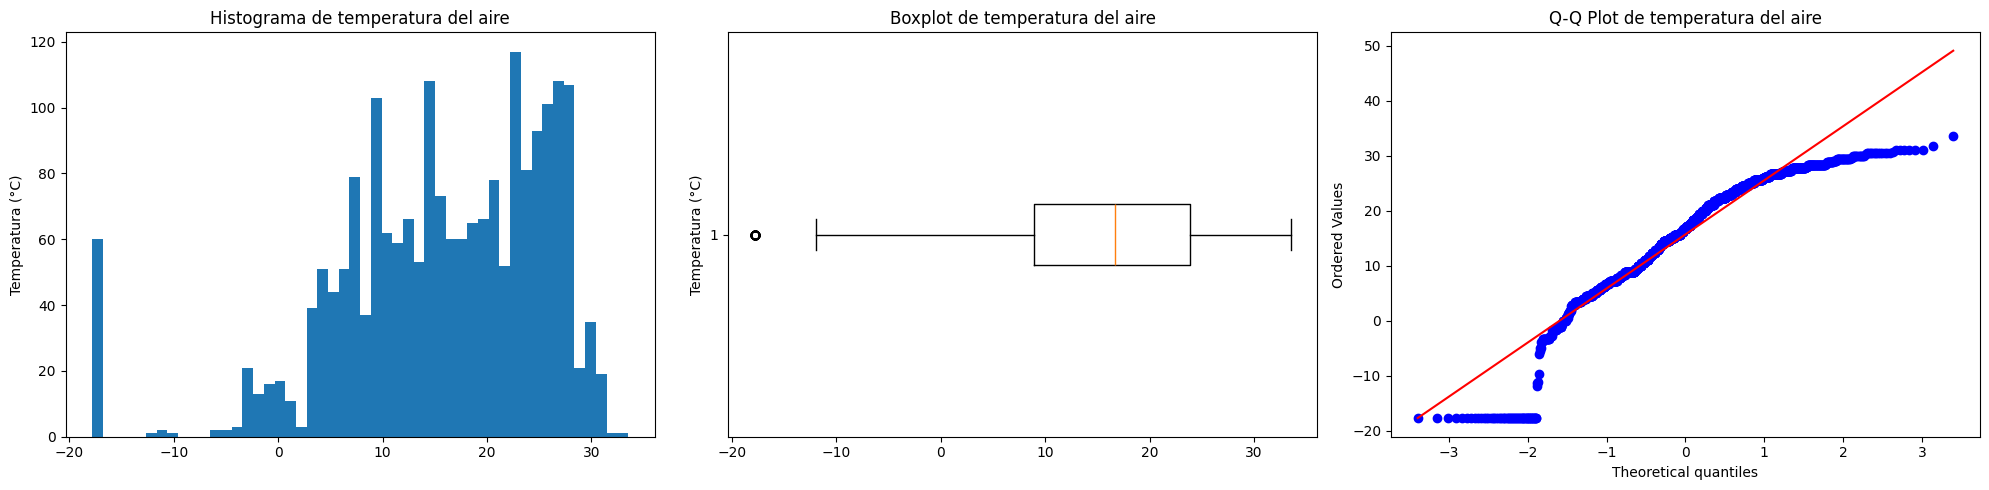

In [ ]:
# Crear subgráficos
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Boxplot en el primer subgráfico
axs[0].hist(df["temperatura_aire"],bins = 50)
axs[0].set_title("Histograma de temperatura del aire")
axs[0].set_ylabel("Temperatura (°C)")

# Boxplot en el segundo subgráfico
axs[1].boxplot(df["temperatura_aire"],vert=False)
axs[1].set_title("Boxplot de temperatura del aire")
axs[1].set_ylabel("Temperatura (°C)")

# Q-Q Plot
stats.probplot(df["temperatura_aire"], dist="norm", plot=axs[2])  # Q-Q plot
axs[2].set_title("Q-Q Plot de temperatura del aire")

plt.tight_layout()  # Ajustar diseño para evitar superposición
plt.show()


### Los graficos que se observan nos muestra la distribucion de nuestra variable objetivo "Temperatura del agua"
* Podemos ver en el HISTOGRAMA un sesgo hacia la izquierda, con temperaturas menores a -10 °C aproximadamente y van hasta los -17 °C aproximadamente.
* En el BOXPLOT se observan outliers, que son los 60 registros de -17 °C
* Vemos el rango intercuartilico que va desde 10 °C hasta 30 °C
* El Q-Q Plot sugiere que los datos no se ajustan perfectamente a una distribución normal, especialmente en las colas. Esto es consistente con la presencia de valores extremos.

In [ ]:
X = df[["temperatura_aire"]] # Modificamos X para que quede del tipo data frame osea una matriz
y = np.array(data["temperatura_agua"]) #variable objetivo o a predecir

print(type(X))
print(type(y)) #La variable objetivo tiene que ser un vector por eso vemos que es del tipo ndarray

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


## Regresion lineal simple con sklearn

In [ ]:
#inicializamos el modelo
model = LinearRegression(fit_intercept=True) #no necesariamente va a pasar por el origen de coordenadas por eso entrenamos el intercepto

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
print("El coheficiente B1 de la regresion lineal simple con sklearn es: ",model.coef_)
print("El intercepto B0 de la regresion lineal simple con sklearn es: ",model.intercept_)

El coheficiente B1 de la regresion lineal simple con sklearn es:  [0.5437419]
El intercepto B0 de la regresion lineal simple con sklearn es:  9.631232685238198


## Interpretacion de coheficientes.
B0 = 9.631232 <br>
Este coheficiente indica que cuando la temperatura del aire es 0, de todas maneras es 9.60 grados<br>
B1 = 0.5437419 <br>
Este coheficiente indica que cuando agregamos 1 unidad a Temperatura del aire, la tempratura del agua aumenta 0.54 grados<br>

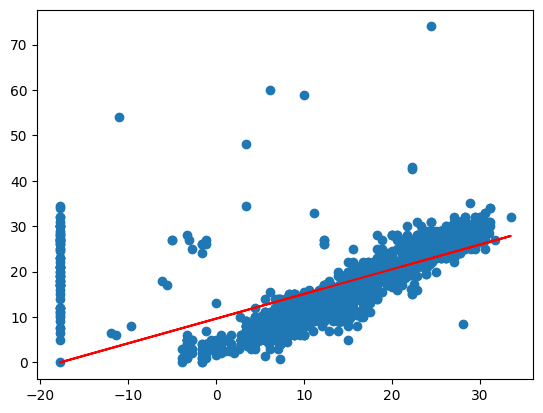

In [ ]:
y_hat = model.predict(X)
plt.scatter(X,y)
plt.plot(X,y_hat,color='red')
plt.show()

### Se observa como la linea esta fuertemente afectada por los valores del rango -5°C a -20°C en temperatura del aire.

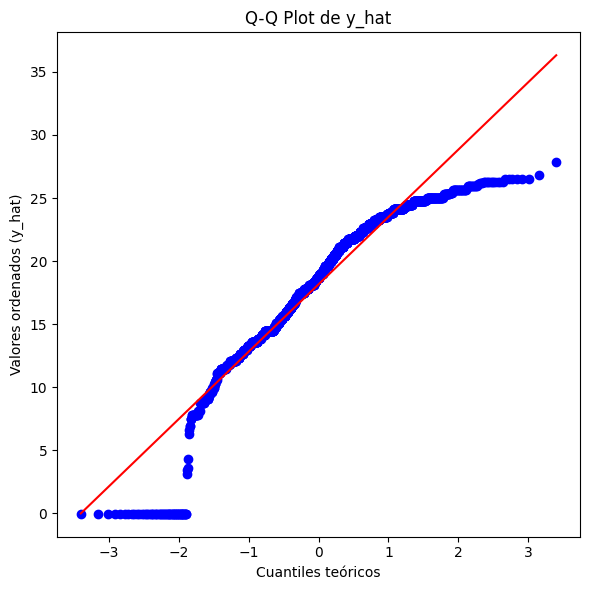

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

stats.probplot(y_hat, dist="norm", plot=ax)

ax.set_title("Q-Q Plot de y_hat")
ax.set_xlabel("Cuantiles teóricos")
ax.set_ylabel("Valores ordenados (y_hat)")

plt.tight_layout()
plt.show()

### Interpretación general del Q-Q plot
* Los no se observa una distribucion normal.
* Línea roja: Representa los valores teóricos si los datos (y_hat) se ajustaran perfectamente a una distribución normal.
* Puntos azules: Son los cuantiles ordenados de y_hat comparados con los cuantiles de la distribución normal teórica.
* los puntos en el rango intermedio (cerca de y_hat = 10-25) están bastante alineados con la la distribucion teorica, lo que indica que estos valores predichos tienen una distribución cercana a la normal.
* En los extremos los puntos están alejados de la línea roja, lo que indica que las predicciones tienen valores atípicos o colas más largas/más cortas que las de una distribución normal.

### Se observa como afecta la linea los outliers que mencionamos anteriormente al analizar la variable "Temperatura del aire"

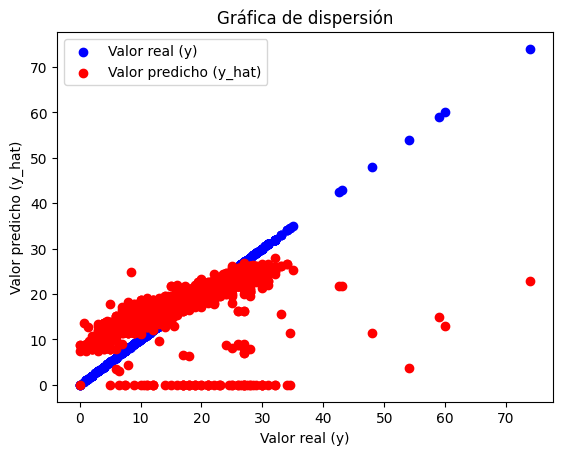

In [ ]:
plt.scatter(y, y, c='blue', label='Valor real (y)')
plt.scatter(y, y_hat, c='red', label='Valor predicho (y_hat)')
plt.xlabel('Valor real (y)')
plt.ylabel('Valor predicho (y_hat)')
plt.title('Gráfica de dispersión')
plt.legend()
plt.show()

#### Vemos que se superponen los valores reales con los valores predichos en un rango de 13°C a 27°C, que anteriormente al analizar la temperatura de de Y ("Temperatura del agua") vimos que los datos se concentraban en este rango.

### Evaluar el modelo

In [ ]:
def evaluacion(y,y_hat):
    r2 = r2_score(y, y_hat)
    mse = mean_squared_error(y, y_hat)
    rmse = np.sqrt(mse)
    a = ("RMSE:", rmse)
    b = ("R²:", r2)
    return print(a,b)

print(evaluacion(y,y_hat))

('RMSE:', 6.191038490842782) ('R²:', 0.4462069009314569)
None


### Evaluaciones del modelo:
* RMSE: 6.19 -> Los valores predichos estan a una distancia de 6.19°c de los valores reales.
* R2: 44.62% -> El modelo explica aproximadamente un 44.62% de la varianza en la variable dependiente.

# En conclusión:
* Visualizamos correlaciones para ver cual se adaptaba mas a nuestra variable Y ("Temperatura del agua")
* Hicimos un analisis de distribucion de las variables dependiente e independiente, donde se obtuve informacion muy importante.
* Realizamos una regresion lineal simple (SIN ELIMINAR OUTLIERS), ademas, vimos si los residuos seguian una distribucion normal y tambien vimos donde se superponian los datos de Y e Y PREDICHA.
* Por ultimo, evaluamos el modelo con REMSE y R2.